#### Do Membership Levels Influence Average Item Value?

In [2]:
# Import the file csv to get the columns Data and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data/customer_arrivals_removed_outliers_.csv')

In [3]:
# import the function form the file 

import sys 
sys.path.append("..")

from Assumption_check import check_equal_variance,check_Normality

#### 1. Create Group

In [4]:
group_data = [
    df[df['Membership_Status'] == m]['Avg_Item_Value'].dropna()
    for m in df['Membership_Status'].unique()
]

#### 2. Check normality of each group

In [5]:
for m in df['Membership_Status'].unique():
    check_Normality(df[df['Membership_Status'] == m]['Avg_Item_Value'], Group_name=m)

Checking the normality of the Group Gold

Shapiro test result statisticcs:0.9552 , p-value:0.0195

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Regular

Shapiro test result statisticcs:0.8978 , p-value:0.0001

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Platinum

Shapiro test result statisticcs:0.9339 , p-value:0.0015

 ❌ Not Likely normal distribution.
------------------------------------------------------------


#### Checking the Equal Varience of all the Membership 

In [6]:
from scipy.stats import levene

#Running the Levene function
levene_stat, p_levene = levene(*group_data)
print(f"Levene Test: p = {p_levene:.4f}")

Levene Test: p = 0.5470


#### => Run Kruskal-Wallis 

In [7]:
from scipy.stats import kruskal

#Running Kruskal function
kruskal_stat, p_val = kruskal(*group_data)
print(f"Kruskal-Wallis: Stats = {kruskal_stat:.4f}, p = {p_val:.4f}\n")

#Checking the p_value to know it significance
if p_val > 0.05:
  print('Significant difference exists')
else:
  print(' No Significant difference exists')

Kruskal-Wallis: Stats = 4.6096, p = 0.0998

Significant difference exists


#### => Run Dunn Test

#### We are going under the Dunn test because there is significant difference exist

In [8]:
import scikit_posthocs as sp

# Only keep the two columns
subset = df[['Membership_Status', 'Avg_Item_Value']].dropna()

# Run Dunn’s Test
posthoc = sp.posthoc_dunn(subset, val_col='Avg_Item_Value', group_col='Membership_Status', p_adjust='holm')

# Display the pairwise comparison p-values
print("📊 Dunn Test Results (holm-corrected p-values):")
print(posthoc)


📊 Dunn Test Results (holm-corrected p-values):
              Gold  Platinum   Regular
Gold      1.000000  0.336915  0.460359
Platinum  0.336915  1.000000  0.104587
Regular   0.460359  0.104587  1.000000


#### Visual Representation of the boxplot 

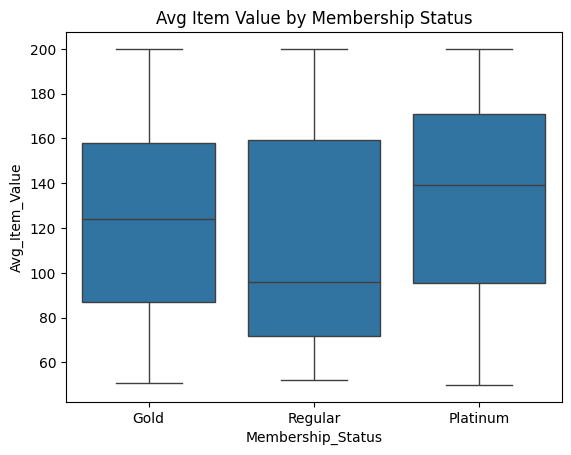

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visual representation of the membership
sns.boxplot(x='Membership_Status', y='Avg_Item_Value', data=df)
plt.title("Avg Item Value by Membership Status")
plt.show()


#### Visual Representation of the Heatmap

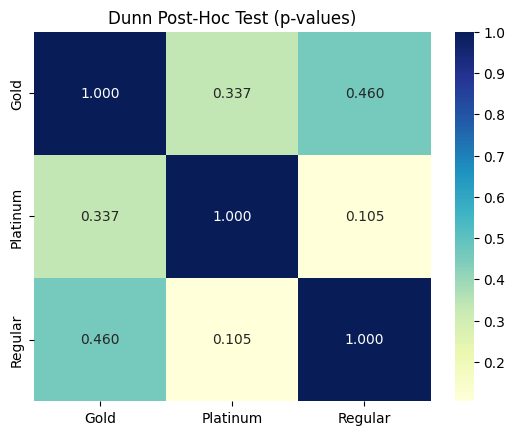

In [10]:
#Visual Representation of the Dunn Test 

sns.heatmap(posthoc, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Dunn Post-Hoc Test (p-values)")
plt.show()

## Calcuate the difference in % btw different membership

In [13]:
groups = df.groupby('Membership_Status')['Avg_Item_Value'].mean()
print(groups)

Membership_Status
Gold        120.692308
Platinum    131.910448
Regular     114.714286
Name: Avg_Item_Value, dtype: float64


In [16]:
regular = groups['Regular']
gold = groups['Gold']
platinum = groups['Platinum']

# % difference from Regular
gold_vs_regular = ((gold - regular) / regular) * 100
platinum_vs_regular = ((platinum - regular) / regular) * 100
platinum_vs_gold = ((platinum - gold) / gold) * 100

print(f"Gold vs Regular: {gold_vs_regular:.2f}% higher")
print(f"Platinum vs Regular: {platinum_vs_regular:.2f}% higher")
print(f"Platinum vs Gold: {platinum_vs_gold:.2f}% higher")
print("-"*60)


Gold vs Regular: 5.21% higher
Platinum vs Regular: 14.99% higher
Platinum vs Gold: 9.29% higher
------------------------------------------------------------


###  Membership Tier vs. Average Item Value (₹)

**Insights:**

- **1. Gold members** spend **5.21% more per item** than Regular members.
- **2. Platinum members** spend:

  - **14.99% more per item** than Regular members
  - **9.29% more per item** than Gold members

---